# Data Analyst Project: Rent Bike Project Analyst
- Nama: Andreas Fernandez Wauran
- Id Dicoding: andreas_wauran

## Define Business Questions

- Is there a relationship between the number of bicycle renters and environmental conditions such as temperature, perceived temperature, wind speed, and humidity?
- At what time does bike rental activity peak?
- In what month do most bicycle rentals occur?
- In what season is bicycle rental activity highest?
- Under what weather conditions does bicycle rental occur most often?

## Prepare all required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
hours_df = pd.read_csv("data/hours_df.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
days_df = pd.read_csv("data/days_df.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [6]:
hours_df.info() # type variable pada dteday masih berupa objek

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hours_df.duplicated().sum()

0

In [8]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
days_df.info() # type variable pada dteday masih berupa objek

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
days_df.duplicated().sum()

0

In [11]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [12]:
# Merubah tipe data objek menjadi datetime pada variabel dteday (dataframe days dan hours)
days_df["dteday"] = pd.to_datetime(days_df["dteday"])
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"])

In [13]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
# Unnormalized Data
days_df["atemp"] = days_df["atemp"]*50
days_df["temp"] = days_df["temp"]*41
days_df["windspeed"] = days_df["windspeed"]*67
days_df["hum"] = days_df["hum"]*100

hours_df["atemp"] = hours_df["atemp"]*50
hours_df["temp"] = hours_df["temp"]*41
hours_df["windspeed"] = hours_df["windspeed"]*67
hours_df["hum"] = hours_df["hum"]*100

In [18]:
hours_df.to_csv("dashboard/hours_df.csv", index=False)
days_df.to_csv("dashboard/days_df.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Order Customers

In [19]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [20]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [21]:
def cnt_data(by, df):
    data = df.groupby(by=by).agg({
        "cnt": ["sum", "max", "min"],
        "casual": ["sum", "max", "min"],
        "registered": ["sum", "max", "min"]
    })
    
    return data

In [22]:
# Total Kustomer yang merental per Seasonnya
cnt_data("mnth", days_df)

cnt             casual            registered            
         sum   max   min    sum   max  min        sum   max   min
mnth                                                             
1     134933  4521   431  12042  1070    9     122891  4185   416
2     151352  5062  1005  14963  1435   47     136389  4546   905
3     228920  8362   605  44444  3155   46     184476  5893   491
4     269094  7460   795  60802  3252  120     208292  5950   674
5     331686  8294  2633  75285  3410  255     256401  6433  2213
6     346342  8120  3767  73906  2963  477     272436  6456  2993
7     344948  8173  3285  78157  3065  562     266791  6790  2298
8     351194  7865  1115  72039  2827  226     279155  6541   889
9     345991  8714  1842  70323  3160  118     275668  6946  1689
10    322352  8156    22  59760  3031    2     262592  6911    20
11    254831  6852  1495  36603  2290   69     218228  5520   935
12    211036  6606   441  21693  1153    9     189343  6055   432

In [23]:
# Total Kustomer yang merental per Seasonnya
cnt_data("season", days_df)

cnt              casual            registered           
            sum   max   min     sum   max  min        sum   max  min
season                                                              
1        471348  7836   431   60622  3155    9     410726  5315  416
2        918589  8362   795  203522  3410  120     715067  6456  674
3       1061129  8714  1115  226091  3160  118     835038  6917  889
4        841613  8555    22  129782  3031    2     711831  6946   20

In [24]:
# Total Kustomer yang merental saat holiday
cnt_data("workingday", days_df)

cnt             casual           registered           
                sum   max  min     sum   max min        sum   max  min
workingday                                                            
0           1000269  8714  605  316732  3410  54     683537  5966  451
1           2292410  8362   22  303285  2469   2    1989125  6946   20

In [25]:
# Total Kustomer yang merental saat holiday
cnt_data("holiday", days_df)

cnt              casual            registered           
             sum   max   min     sum   max  min        sum   max  min
holiday                                                              
0        3214244  8714    22  597658  3410    2    2616586  6946   20
1          78435  7403  1000   22359  3065  117      56076  5172  573

In [26]:
# Total Kustomer yang merental per hari
cnt_data("weekday", days_df)

cnt              casual           registered            
            sum   max   min     sum   max min        sum   max   min
weekday                                                             
0        444027  8227   605  140521  3283  54     303506  5657   451
1        455503  7525    22   70784  3065   2     384719  6435    20
2        469109  7767   683   57843  1348   9     411266  6697   573
3        473048  8173   441   57319  2562   9     415729  6946   432
4        485395  7804   431   61460  1405  15     423935  6781   416
5        487790  8362  1167   78238  2469  38     409552  6917  1129
6        477807  8714   627  153852  3410  57     323955  5966   570

In [27]:
# Total Kustomer yang merental per Kondisi cuaca
cnt_data("weathersit", days_df)

cnt             casual           registered           
                sum   max  min     sum   max min        sum   max  min
weathersit                                                            
1           2257952  8714  431  446346  3410  15    1811606  6946  416
2            996858  8362  605  169776  3155   9     827082  6844  491
3             37869  4639   22    3895  1264   2      33974  4324   20

In [28]:
# Total Kustomer yang merental per hari libur
cnt_data("holiday", days_df)

cnt              casual            registered           
             sum   max   min     sum   max  min        sum   max  min
holiday                                                              
0        3214244  8714    22  597658  3410    2    2616586  6946   20
1          78435  7403  1000   22359  3065  117      56076  5172  573

In [29]:
# Total Kustomer yang merental per tahun
cnt_data("yr", hours_df)

cnt           casual          registered         
        sum  max min     sum  max min        sum  max min
yr                                                       
0   1243103  651   1  247252  272   0     995851  567   0
1   2049576  977   1  372765  367   0    1676811  886   0

### Explore Faktor Lingkungan

In [30]:
def env_data(by, df):
    data = df.groupby(by=by).agg({
        "temp": ["max", "min", "mean"],
        "atemp": ["max", "min", "mean"],
        "hum": ["max", "min", "mean"],
        "windspeed": ["max", "min", "mean"]
    })
    
    return data

In [31]:
env_data("season", days_df)

temp                           atemp                       \
              max        min       mean       max       min       mean   
season                                                                   
1       23.472500   2.424346  12.207650  27.43085   3.95348  14.845697   
2       33.141653  10.374763  22.320611  37.87895  12.51695  26.015366   
3       35.328347  19.235847  28.958682  42.04480  12.12000  32.794920   
4       26.957500   9.054153  17.339148  30.39875  11.39565  20.776937   

            hum                      windspeed                       
            max      min       mean        max       min       mean  
season                                                               
1       94.8261   0.0000  58.290291  34.000021  3.042356  14.373984  
2       92.2500  25.4167  62.694833  26.000489  4.417256  13.634978  
3       93.9565  36.0000  63.348206  25.166339  4.292744  11.530366  
4       97.2500  33.3478  66.871917  28.292425  1.500244  11.523637

In [32]:
env_data("mnth", days_df)

temp                           atemp                           hum  \
            max        min       mean       max       min       mean      max   
mnth                                                                            
1     17.425000   2.424346   9.694201  20.76915   3.95348  11.989795  91.1250   
2     21.388347   5.227500  12.268284  25.59915   5.08290  14.986563  92.9167   
3     24.668347   8.131653  16.012089  28.50335  10.00665  19.097685  94.8261   
4     27.230847  12.300000  19.269952  30.74625  14.17270  22.854045  88.8333   
5     31.775000  16.980847  24.386735  36.26915  20.23250  28.283100  92.2500   
6     34.200847  22.174153  28.047985  39.33065  26.29460  31.912286  83.3333   
7     35.328347  24.429153  30.974287  42.04480  27.49560  35.204693  86.5417   
8     32.526653  26.069153  29.051844  37.56335  12.12000  32.573740  85.0000   
9     30.886653  19.235847  25.275884  35.44915  23.07375  28.964954  97.2500   
10    26.957500  10.420847  19.885500  30.39875  11.39565  23.598660  90.6250   
11    21.730000  10.079153  15.138010  26.23060  12.43710  18.367938  96.2500   
12    19.509153   8.849153  13.285270  23.45270  11.01665  16.307985  97.0417   

                          windspeed                       
          min       mean        max       min       mean  
mnth                                                      
1     31.1250  58.582827  27.833743  4.917519  13.822285  
2     18.7917  56.746468  34.000021  3.042356  14.450824  
3      0.0000  58.847503  29.584721  6.000406  14.920863  
4     25.4167  58.806312  26.000489  4.417256  15.710310  
5     36.0417  68.895831  22.958689  5.000712  12.260258  
6     30.5000  57.580552  23.292014  5.167375  12.423134  
7     39.6250  59.787632  19.082471  5.416950  11.125941  
8     41.5000  63.773010  25.166339  4.708981  11.585516  
9     46.7083  71.471437  23.958329  3.375406  11.118323  
10    46.3333  69.376087  28.292425  1.500244  11.738767  
11    33.3478  62.487648  25.250357  3.125550  12.314695  
12    44.1250  66.604052  27.292182  3.167425  11.832798

In [33]:
env_data("weathersit", days_df)

temp                          atemp                       \
                  max       min       mean       max       min       mean   
weathersit                                                                  
1           35.328347  2.424346  20.973200  42.04480   3.95348  24.429808   
2           33.415000  4.407500  19.284996  41.31855   5.96685  22.643400   
3           25.990433  8.917500  17.771046  27.76805  10.18000  20.653200   

                hum                      windspeed                       
                max      min       mean        max       min       mean  
weathersit                                                               
1           83.5833  18.7917  56.559439  34.000021  1.500244  12.746926  
2           97.2500  40.7083  72.588678  27.791600  3.167425  12.490863  
3           97.0417   0.0000  84.887248  23.999400  6.500394  16.303489

## Visualization & Explanatory Analysis

### Pertanyaan 1: Korelasi Pelanggan dengan faktor lingkungannya

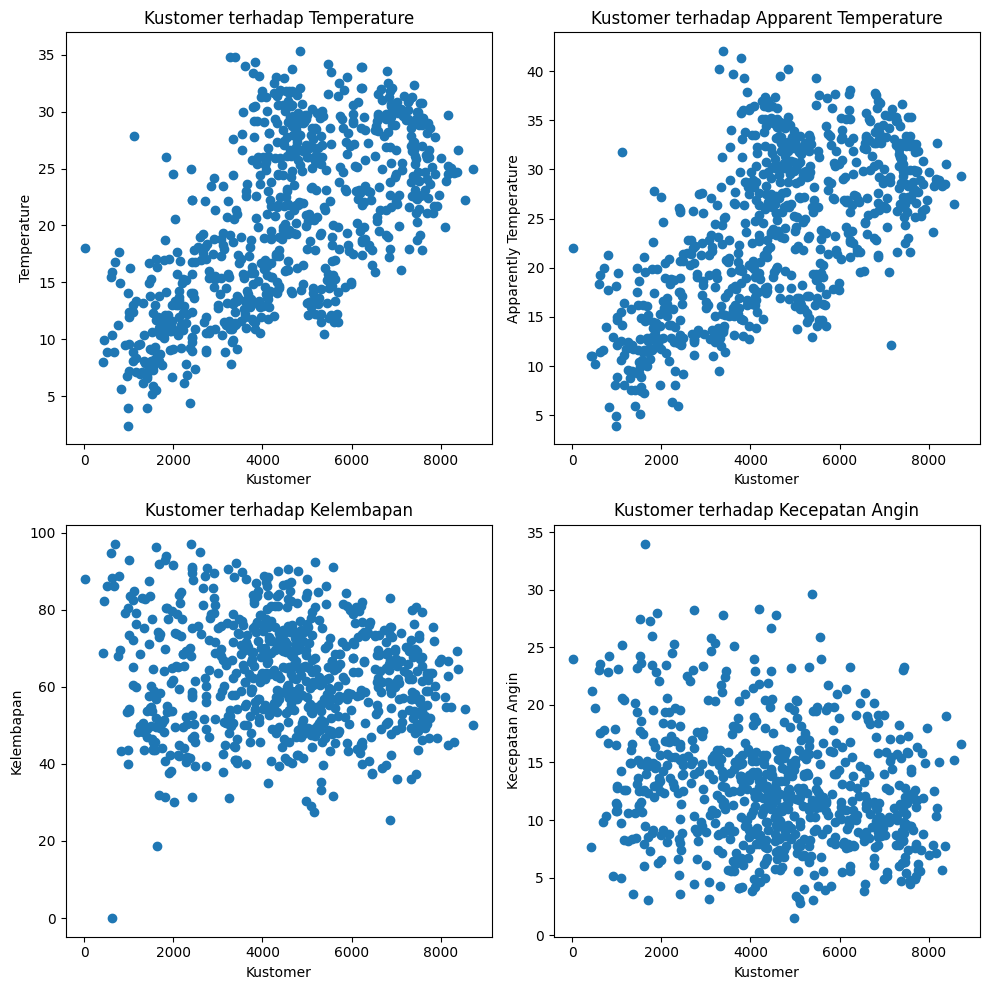

In [34]:
# Memploting Korelasi antara banyaknya perentalan pelanggan dengan faktor lingkungannya
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(data=days_df, x="cnt", y="temp")
plt.title('Kustomer terhadap Temperature')
plt.xlabel("Kustomer")
plt.ylabel("Temperature")

plt.subplot(2, 2, 2)
plt.scatter(data=days_df, x="cnt", y="atemp")
plt.title('Kustomer terhadap Apparent Temperature')
plt.xlabel("Kustomer")
plt.ylabel("Apparently Temperature")

plt.subplot(2, 2, 3)
plt.scatter(data=days_df, x="cnt", y="hum")
plt.title('Kustomer terhadap Kelembapan')
plt.xlabel("Kustomer")
plt.ylabel("Kelembapan")

plt.subplot(2, 2, 4)
plt.scatter(data=days_df, x="cnt", y="windspeed")
plt.title('Kustomer terhadap Kecepatan Angin')
plt.xlabel("Kustomer")
plt.ylabel("Kecepatan Angin")

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 2: Korelasi Pelanggan pada Jam" tertentu

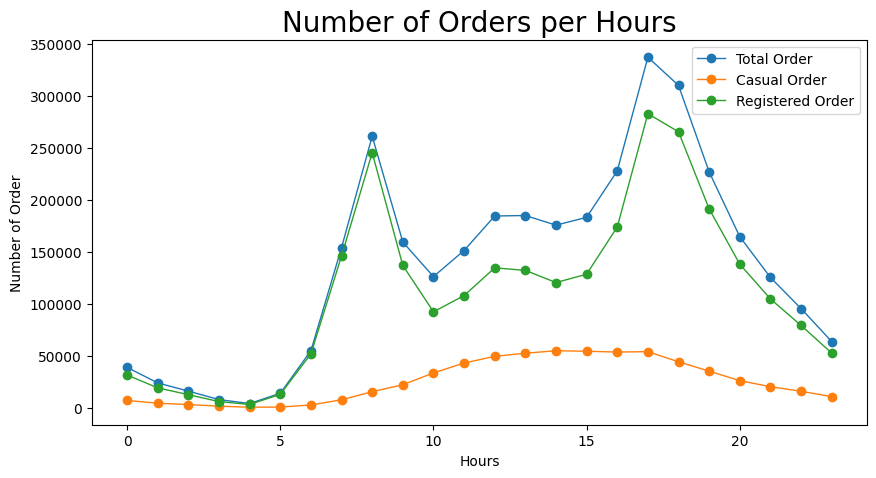

In [35]:
by_hour = hours_df.groupby("hr").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).reset_index()

plt.figure(figsize=(10, 5)) 
plt.plot(by_hour["hr"], by_hour["cnt"], marker='o', linewidth=1, label="Total Order") 
plt.plot(by_hour["hr"], by_hour["casual"], marker='o', linewidth=1, label="Casual Order") 
plt.plot(by_hour["hr"], by_hour["registered"], marker='o', linewidth=1, label="Registered Order") 
plt.title("Number of Orders per Hours", loc="center", fontsize=20) 
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Number of Order")
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 3: Korelasi Pelanggan pada Bulan tertentu

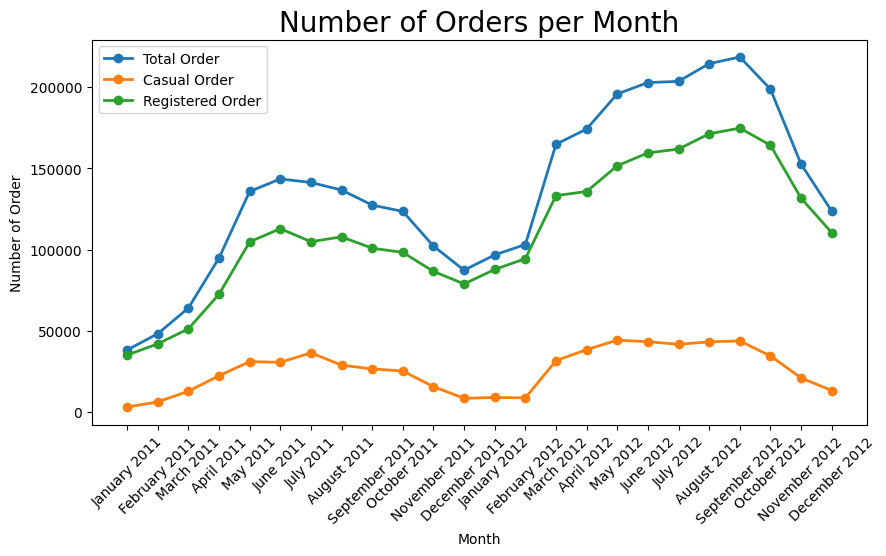

In [36]:
monthly_cnt_df = days_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

monthly_cnt_df.index = monthly_cnt_df.index.strftime('%B %Y') #mengubah format order date menjadi nama bulan
monthly_cnt_df = monthly_cnt_df.reset_index()

plt.figure(figsize=(10, 5)) 
plt.plot(monthly_cnt_df["dteday"], monthly_cnt_df["cnt"], marker='o', linewidth=2, label="Total Order") 
plt.plot(monthly_cnt_df["dteday"], monthly_cnt_df["casual"], marker='o', linewidth=2, label="Casual Order") 
plt.plot(monthly_cnt_df["dteday"], monthly_cnt_df["registered"], marker='o', linewidth=2, label="Registered Order") 
plt.title("Number of Orders per Month", loc="center", fontsize=20) 
plt.legend()
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10)
plt.xlabel("Month")
plt.ylabel("Number of Order")
plt.show()

### Pertanyaan 4: Korelasi Pelanggan pada Musim tertentu

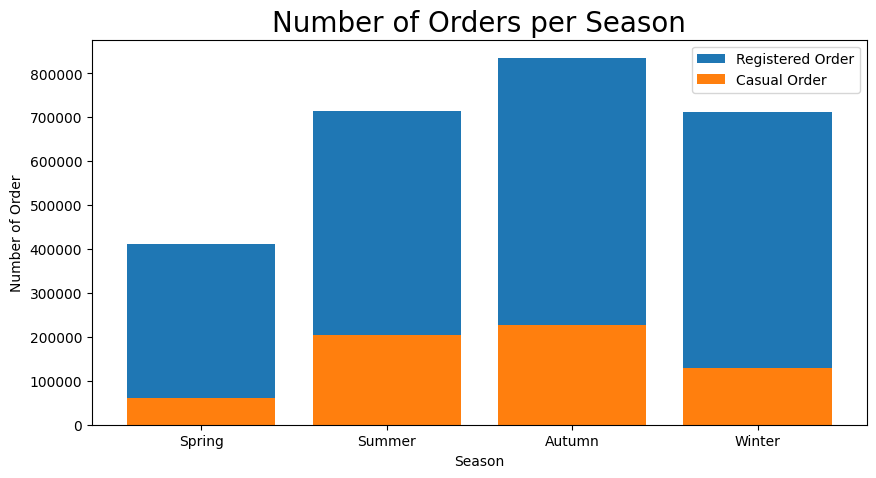

In [37]:
by_season = days_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

season = {1:"Spring", 2: "Summer", 3:"Autumn", 4:"Winter"}
by_season["season"]= by_season["season"].map(season)

plt.figure(figsize=(10, 5)) 
plt.bar(by_season["season"], by_season["registered"], label="Registered Order") 
plt.bar(by_season["season"], by_season["casual"], label="Casual Order") 
plt.title("Number of Orders per Season", loc="center", fontsize=20) 
plt.legend()
plt.xlabel("Season")
plt.ylabel("Number of Order")
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 5: Korelasi Pelanggan pada Kondisi Cuaca

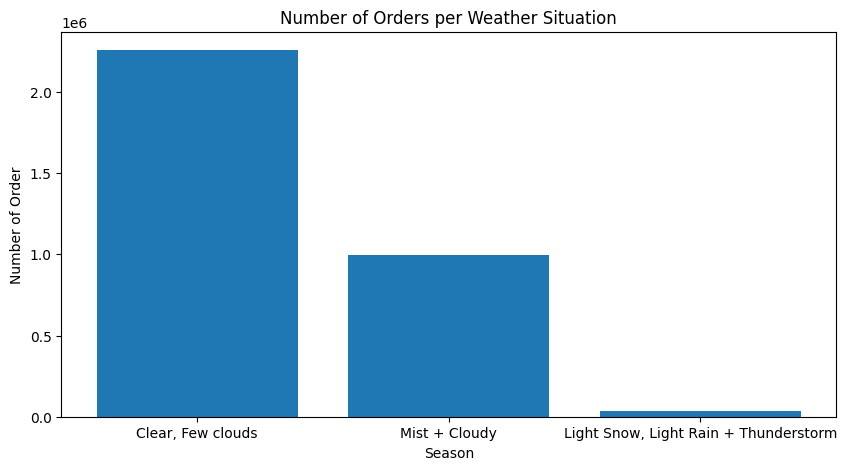

In [38]:
by_weather = days_df.groupby("weathersit").agg({
    "cnt": "sum"
}).reset_index()

weather = {1:"Clear, Few clouds", 
           2:"Mist + Cloudy",
           3:"Light Snow, Light Rain + Thunderstorm"}
by_weather["weathersit"]= by_weather["weathersit"].map(weather)

plt.figure(figsize=(10, 5)) 
plt.bar(by_weather["weathersit"], by_weather["cnt"]) 
plt.xlabel("Season")
plt.ylabel("Number of Order")
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.title("Number of Orders per Weather Situation")
plt.show()

## Conclusion

- Temperature (Temperature and Apparently Temperature) plays a strong role in determining the number of bicycle renters, while Windspeed and Humidity have little influence.
- Peak bicycle rental times occur at 06:00-08:00 and 15:00-17:00, when many people are actively exercising.
- The favorite months for bicycle rental are March to September.
- Spring sees a decrease in bike rentals compared to other seasons.
- Sunny/cloudy weather conditions positively influence bike rentals, while bad weather rarely triggers rental activity.